In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [0]:
def gmm(X, K, max_iter=20, smoothing=1e-2):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.zeros((N, K))
    C = np.zeros((K, D, D))
    pi = np.ones(K) / K  #uniform 

    #initialize M to random, initialize C to spherical with variance 1
    for k in range(K):
        M[k] = X[np.random.choice(N)]
        C[k] = np.eye(D)

    lls = []
    weighted_pdfs = np.zeros((N, K)) #we will use these to store PDF value of sample n and Gaussian k
    for i in range(max_iter):
        #step-1 determine assignments/ responsibilities
        for k in range(K):
            weighted_pdfs[:, k] = pi[k] * multivariate_normal.pdf(X, M[k], C[k])
        R = weighted_pdfs / weighted_pdfs.sum(axis=1, keepdims=True)

        # step-2 recalculate parameters
        for k in range(K):
            Nk = R[:,k].sum()
            pi[k] = Nk / N
            M[k] = R[:,k].dot(X) / Nk

            delta = X - M[k] #NxD
            Rdelta = np.expand_dims(R[:,k], -1) * delta #multiplies R[:,k] by each col of delta N x D
            C[k] = Rdelta.T.dot(delta) / Nk + np.eye(D) * smoothing # D x D 


        ll = np.log(weighted_pdfs.sum(axis=1)).sum()
        lls.append(ll)
        if i > 0:
            if np.abs((lls[i] - lls[i-1])) < 0.1:
                break

    plt.plot(lls)
    plt.title("Log-Likelihood")
    plt.show()

    random_colors = np.random.random((K, 3))
    colors = R.dot(random_colors)
    plt.scatter(X[:,0], X[:,1], c=colors)
    plt.show()

    print("pi", pi)
    print("Means:", M)
    print("covariances:", C)
    return R

In [0]:
def main():
    #assume 3 means
    D = 2 #so we can visualize it better
    s = 4 #separation so we can controlhow far apart the means are
    mu1 = np.array([0,0])
    mu2 = np.array([s,s])
    mu3 = np.array([0,s])

    N = 2000 #number of samples
    X = np.zeros((N,D))
    X[:1200,:] = np.random.randn(1200, D) * 2 + mu1
    X[1200:1800, :] = np.random.randn(600, D)  + mu2
    X[1800:, :] = np.random.randn(200, D) * 0.5 + mu3

    #without clustering
    plt.scatter(X[:,0], X[:,1])
    plt.show()

    K=3
    gmm(X,K)


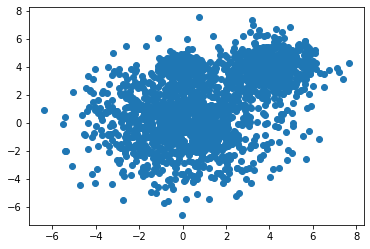

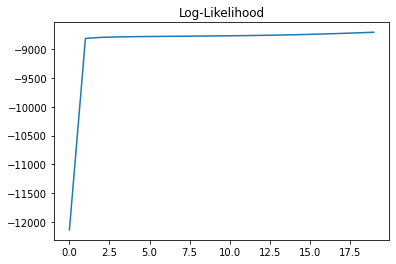

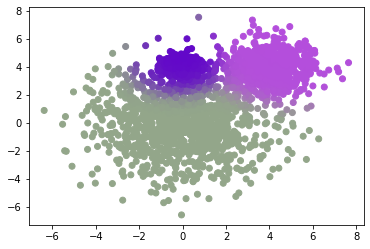

pi [0.54800972 0.31048024 0.14151004]
Means: [[-0.03712504 -0.26271784]
 [ 3.97213808  3.95997896]
 [-0.03130575  3.70523632]]
covariances: [[[ 4.03946912 -0.21358019]
  [-0.21358019  3.54784663]]

 [[ 1.08782284  0.05762059]
  [ 0.05762059  1.09059941]]

 [[ 0.59568513  0.05030265]
  [ 0.05030265  0.67883427]]]


In [8]:
if __name__ == '__main__':
    main()